###  Run Data Exploration
- Plot Datainstances by class
- Calculate MAE after rescaling data to MinMax for comaparability 
- Calculate Pearson Correlation Coeff 

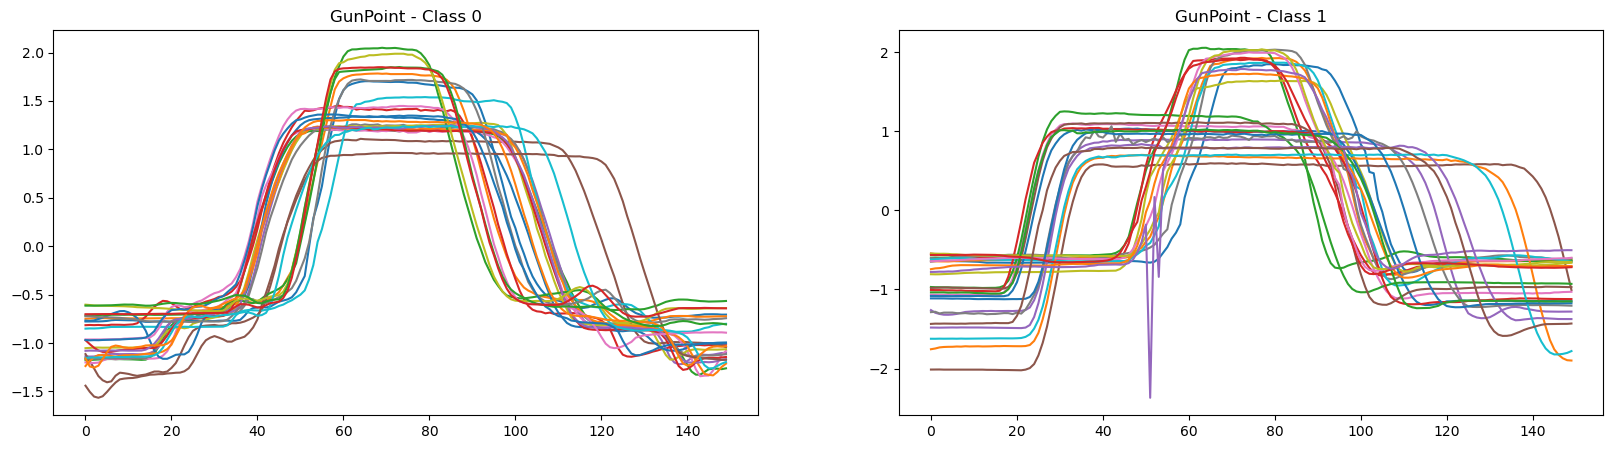

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset_name = 'GunPoint'

datasets_dict = read_dataset(root_dir, archive_name, dataset_name, 'original', 1)
x_train, y_train, x_test, y_test = datasets_dict[dataset_name]

fig, axes = plt.subplots(nrows=1, ncols=len(np.unique(y_train.flatten())), figsize=(20, 5))

for i,y in enumerate(np.unique(y_train.flatten())):
    for ts in (np.where(y_train.flatten()==y)[0]):
        axes[i].plot(x_train[ts])
        axes[i].set_title(f"{dataset_name} - Class {i}")

plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from utils.explanations import minmax_norm
from utils.utils import read_dataset
import numpy as np
import os

root_dir = 'G:/Meine Ablage/master thesis/code/xai-tsc'
archive_name = 'ucr'

#run over all datasets: 
def calculate_inbetween_distance(dataset_name):
    #load dataset
    datasets_dict = read_dataset(root_dir, archive_name, dataset_name, 'original', 1)
    x_train, y_train, x_test, y_test = datasets_dict[dataset_name]

    mean_inbetween_distance = 0 
    mean_inbetween_distance_classwise = dict()
    output = []
    for x_vals,y_vals in [[x_train,y_train],[x_test,y_test]]:
        for x,y in zip(x_vals,y_vals):
            mean_inbetween_distance_classwise[int(y)] = []
            for x_n,y_n in zip(x_vals,y_vals):
                if np.array_equal(x,x_n): continue
                mae = mean_absolute_error(minmax_norm(x),minmax_norm(x_n))
                if y == y_n: mean_inbetween_distance_classwise[int(y)].append(mae)
                mean_inbetween_distance += mae
        for k in mean_inbetween_distance_classwise.keys():
            mean_inbetween_distance_classwise[k] = sum(mean_inbetween_distance_classwise[k]) / len(mean_inbetween_distance_classwise[k])
        mean_inbetween_distance = mean_inbetween_distance / len(x_vals)
        output.append([mean_inbetween_distance, mean_inbetween_distance_classwise])
    return output
calculate_inbetween_distance('GunPoint')

#15.392490723221451 {-1: 0.1642406900342371, 1: 0.10929426415270826}
#3.7810051950669235 {1: 0.2535723539114696,  2: 0.07805331585756228, 3: 0.056529535467279304, 4: 0.052985928582427386, 5: 0.08730261301622906}

y


TypeError: 'numpy.float64' object is not iterable

In [ ]:
%matlotlib inline
import matplotlib.pyplot as plt

datasets_dict = read_dataset(root_dir, archive_name, dataset_name, 'original', 1)
x_train, y_train, x_test, y_test = datasets_dict[dataset_name]

plt.plot()